# 04-Data wrangling

This notebook gives an introduction to the most common operations for transforming and cleaning data in `pandas`.

Data wrangling is the process of transforming data to a format that is suitable for answering an analytical question. This involves e.g. creating new variables, filtering rows, combining data sets etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data transformation

In [2]:
grade_dict = {'Name'  : ['Ole', 'Jenny', 'Chang', 'Jonas'],
              'Score' : [65.0, 58.0, 79.0, 95.0],
              'Pass'  : ['yes', 'no', 'yes', 'yes']}

In [3]:
df = pd.DataFrame(grade_dict)

df

,Name,Score,Pass
0,Ole,65.0,yes
1,Jenny,58.0,no
2,Chang,79.0,yes
3,Jonas,95.0,yes


**Create new columns**

We have already seen how we can change an existing column in a `DataFrame`, e.g. use `astype` to change the `dtype` of a column.

In [4]:
df['Score'] = df['Score'].astype(int)

df

,Name,Score,Pass
0,Ole,65,yes
1,Jenny,58,no
2,Chang,79,yes
3,Jonas,95,yes


We create a new column in an existing `DataFrame` by assigning a list of values to a new column name using the `=` operator.

In [5]:
df['Age'] = [19, 18, 20, 22]

df

,Name,Score,Pass,Age
0,Ole,65,yes,19
1,Jenny,58,no,18
2,Chang,79,yes,20
3,Jonas,95,yes,22


In [6]:
df['City'] = ['Bergen', 'Oslo', 'Trondheim', 'Bergen']

df

,Name,Score,Pass,Age,City
0,Ole,65,yes,19,Bergen
1,Jenny,58,no,18,Oslo
2,Chang,79,yes,20,Trondheim
3,Jonas,95,yes,22,Bergen


<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Import the file <code>temperatures.xlsx</code> that you created on Day 2, and store it as <code>temp_df</code> (remember to add the excel file to the <code>Data</code> folder).
        
Add a column that records the temperature in your home town (or any other city that you like) for the last seven days.

</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
# import file
temps_df = pd.read_excel('data/temperatures.xlsx')
    
# add column for home town
temp_df['mo i rana'] = [-7, -11, -12, -13, -6, 1, 2]
```

</p>
</details> 

In [7]:
temp_df = pd.read_excel('data/temperatures.xlsx')


temp_df["Stavanger"] = [6,5,6,5,5,9,10]
temp_df

,Unnamed: 0,Oslo,Bergen,Trondheim,Stavanger
0,0,0,4,0,6
1,1,-4,3,-1,5
2,2,-3,4,-3,6
3,3,0,3,-2,5
4,4,3,3,-2,5
5,5,5,7,-5,9
6,6,4,8,-6,10


Notice that we can create a new column based on the values in an existing column.

In [8]:
df['Score_share'] = df['Score'] / 100

df

,Name,Score,Pass,Age,City,Score_share
0,Ole,65,yes,19,Bergen,0.65
1,Jenny,58,no,18,Oslo,0.58
2,Chang,79,yes,20,Trondheim,0.79
3,Jonas,95,yes,22,Bergen,0.95


<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Import <code>mpg.xlsx</code> as <code>mpg_df</code>. The column <code>model_year</code> ranges from 1970 to 1984, but it contains only the last two digits of the year. Change the column so that it also contains the two first digits. E.g. '74' should be '1974'.

</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
    
# import df
mpg_df = pd.read_excel('data/mpg.xlsx')
    
# Alternative 1:
# convert to string and then add the string "19" to the beginning of each year

mpg_df['model_year'] = mpg_df['model_year'].astype('str')

mpg_df['model_year'] = '19' + mpg_df['model_year']
 
    
# Alternative 2
# keep as integer and simply add 1900 to each year

mpg_df['model_year'] = mpg_df['model_year'] + 1900

```

</p>
</details> 

In [9]:
mpg_df = pd.read_excel("data/mpg.xlsx")
mpg_df["model_year"] = mpg_df["model_year"]+1900
mpg_df

,mpg,cylinders,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,140.0,3449,10.5,1970,usa,ford torino
...,...,...,...,...,...,...,...,...
393,27.0,4,86.0,2790,15.6,1982,usa,ford mustang gl
394,44.0,4,52.0,2130,24.6,1982,europe,vw pickup
395,32.0,4,84.0,2295,11.6,1982,usa,dodge rampage
396,28.0,4,79.0,2625,18.6,1982,usa,ford ranger


**Drop rows and columns**

We drop rows and columns by using the function `drop`. 

`drop` has two mandatory parameters: the row/column labels that we want to drop, and `axis` which tells the function to drop either rows or columns.


- `axis = 0` will drops rows

- `axis = 1` will drops columns

In [10]:
df.drop(0, axis = 0)

,Name,Score,Pass,Age,City,Score_share
1,Jenny,58,no,18,Oslo,0.58
2,Chang,79,yes,20,Trondheim,0.79
3,Jonas,95,yes,22,Bergen,0.95


In [11]:
df.drop('Score_share', axis = 1)

,Name,Score,Pass,Age,City
0,Ole,65,yes,19,Bergen
1,Jenny,58,no,18,Oslo
2,Chang,79,yes,20,Trondheim
3,Jonas,95,yes,22,Bergen


We can store the modified `DataFrame` in a new variable.

In [12]:
df1 = df.drop('Score_share', axis = 1)

In [13]:
df1

,Name,Score,Pass,Age,City
0,Ole,65,yes,19,Bergen
1,Jenny,58,no,18,Oslo
2,Chang,79,yes,20,Trondheim
3,Jonas,95,yes,22,Bergen


We can drop several columns by passing a *list* of column names to the the `drop` function. 

In [14]:
df.drop(['Score_share', 'Pass'], axis = 1)

,Name,Score,Age,City
0,Ole,65,19,Bergen
1,Jenny,58,18,Oslo
2,Chang,79,20,Trondheim
3,Jonas,95,22,Bergen


Notice that many functions in `pandas` has an optional parameter called `inplace`. 

Setting `inplace = True` will transform the original `DataFrame`, so that we do not have to store the transformed `DataFrame` in a new variable.

In [15]:
df.drop(['Score_share', 'Pass'], axis = 1, inplace = True)

In [16]:
df

,Name,Score,Age,City
0,Ole,65,19,Bergen
1,Jenny,58,18,Oslo
2,Chang,79,20,Trondheim
3,Jonas,95,22,Bergen


<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Drop the columns <code>oslo</code> and <code>trondheim</code> from <code>temp_df</code>.
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
temp_df.drop(['oslo', 'trondheim'], axis = 1, inplace = True)
```

</p>
</details> 

In [17]:
temp_df.drop(["Oslo","Trondheim"],axis=1,inplace=True)

Sometimes we want to drop rows/columns with missing data from our `DataFrame`. 

In [18]:
titanic = pd.read_csv('data/titanic.csv')

titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
Fare             0
dtype: int64

`dropna` drops rows/columns with missing observations from a `DataFrame`. The specify the `axis` parameter in order to determine whether we want to drop rows or columns:
- `axis = 0` will drop all rows with `Nan`
- `axis = 1` will drop all columns with `NaN`

In [19]:
drop_nan_rows = titanic.dropna(axis = 0)

drop_nan_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500
...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.1250
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000


In [20]:
drop_nan_cols = titanic.dropna(axis = 1)

drop_nan_cols

,PassengerId,Survived,Pclass,Name,Sex,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,8.0500
...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,30.0000


Notice that `dropna` also has the parameter `inplace`. Setting `inplace = True` will drop the rows/columns with missing observations from the original `DataFrame`.

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Drop the rows with missing observations in <code>mpg_df</code>. How many rows are left in <code>mpg_df</code>?
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
# drop rows with missing from original dataframe
mpg_df.dropna(axis = 0, inplace = True)

# number of observations left
print(len(mpg_df))
```

</p>
</details> 

In [21]:
mpg_df.dropna(axis=0,inplace=True)

print(len(mpg_df))


392


**Change index**

We can change the index in a `DataFrame`. However, remember that the index must be unique to every observation!

In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


In [23]:
titanic['PassengerId'].nunique()

891

We change the index of a `DataFrame` by assigning a sequence (e.g. a column) with new index values to the `index` attribute of the `DataFrame`.

In [24]:
titanic.index = titanic['PassengerId']

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
PassengerId,,,,,,,
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
5,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


In [25]:
titanic.drop('PassengerId', axis = 1, inplace = True)

titanic.head()

,Survived,Pclass,Name,Sex,Age,Fare
PassengerId,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Change the index in <code>temp_df</code> to the day of week, i.e. 'mon', 'tue', 'wed',..., 'sun'. 
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
# Alternative 1:
# assign list of new index values to index
    
temp_df.index = ['mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun']
    
    
# Alternative 2:
# add new column with the day of week and then set index equal to new column

temp_df['day'] = ['mon', 'tue', 'wed', 'thur', 'fri', 'sat', 'sun']
    
temp_df.index = temp_df['day']

```

</p>
</details> 

In [26]:

day = ["mon","tue","wed","thu","fri","sat","sun"]

    
temp_df.index = day
        
#temp_df.drop("Unnamed: 0",axis=0,inplace=True)

temp_df

,Unnamed: 0,Bergen,Stavanger
mon,0,4,6
tue,1,3,5
wed,2,4,6
thu,3,3,5
fri,4,3,5
sat,5,7,9
sun,6,8,10


We can reset the index by using the `reset_index` function. We set the parameter `inplace` equal to `True` in order to reset the index in the original `DataFrame`.

In [27]:
titanic.reset_index(inplace = True)

titanic.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500


Notice that `reset_index` is returning the old index as a column to the `DataFrame`. We can avoid this by setting `drop = True`.

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Reset the index in <code>temp_df</code>.
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
# notice that if the dataframe already contains a column identical to the index, i.e. alternative 2 in previous exercise, 
# then you must set 'drop = True' in order to avoid duplication of columns
# try with both 'drop = False' and 'drop = True' and see what happens!
    
temp_df.reset_index(inplace = True, drop = True)


```

</p>
</details> 

In [28]:
temp_df.reset_index(inplace=True,drop=True)

temp_df


,Unnamed: 0,Bergen,Stavanger
0,0,4,6
1,1,3,5
2,2,4,6
3,3,3,5
4,4,3,5
5,5,7,9
6,6,8,10


## Filtering rows

We can select a subset of the rows and columns in a `DataFrame` based on one or several conditions using *relational operators*.

In [29]:
df['Score'] > 80

0    False
1    False
2    False
3     True
Name: Score, dtype: bool

We can store the `Series` of boolean values in a variable.

In [30]:
above_80 = df['Score'] > 80

above_80

0    False
1    False
2    False
3     True
Name: Score, dtype: bool

We can use this `Series` of boolean values to filter the `DataFrame` by placing the `Series` inside the index operator `[]`. 

This will select only the rows for which the value is `True`.

In [31]:
df[above_80]

,Name,Score,Age,City
3,Jonas,95,22,Bergen


Notice that we can place the condition that we want to filter on directly inside the index operator `[]`.

In [32]:
df[df['Score'] > 80]

,Name,Score,Age,City
3,Jonas,95,22,Bergen


Remember that the relational operators are `<`, `>`, `<=`, `>=`, `==`, and `!=`.

In [33]:
df[df['City'] != 'Trondheim']

,Name,Score,Age,City
0,Ole,65,19,Bergen
1,Jenny,58,18,Oslo
3,Jonas,95,22,Bergen


As before, we can save the **subset** of the original `DataFrame` in a new variable. 

However, remember that we must append `copy` at the end of the subset in order to create a new `DataFrame`.

In [34]:
df_above_80 = df[df['Score'] > 80].copy()

In [35]:
df_above_80

,Name,Score,Age,City
3,Jonas,95,22,Bergen


Let us filter the rows in `titanic` on the sex of the passengers.

In [36]:
males = titanic[titanic['Sex'] == 'male'].copy()

males.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500
5,6,0,3,"Moran, Mr. James",male,NaN,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,21.0750


In [37]:
females = titanic[titanic['Sex'] == 'female'].copy()

females.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,30.0708


In [38]:
len(males)

577

In [39]:
len(females)

314

We can double check our numbers using `value_counts`.

In [40]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Notice that we can also filter a `DataFrame` on multiple conditions. 

In [41]:
cond1 = df['Score'] > 80
cond2 = df['City'] != 'Trondheim'

However, each condition must be surrounded by parentheses `()`, and we have to use the operator `|` for 'or' and the operator `&` for 'and'.

In [42]:
df[(cond1) & (cond2)]

,Name,Score,Age,City
3,Jonas,95,22,Bergen


In [43]:
df[(cond1) | (cond2)]

,Name,Score,Age,City
0,Ole,65,19,Bergen
1,Jenny,58,18,Oslo
3,Jonas,95,22,Bergen


<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Display the passengers in <code>titanic</code> that were male AND older than 70 years.
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
titanic[(titanic['Sex'] == 'male') & (titanic['Age'] > 70)]
```

</p>
</details> 

In [44]:
cond1 = titanic['Age'] > 70
cond2 = titanic['Sex'] == "male"

titanic[(cond1)&(cond2)]



,PassengerId,Survived,Pclass,Name,Sex,Age,Fare
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,34.6542
116,117,0,3,"Connors, Mr. Patrick",male,70.5,7.7500
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,49.5042
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,30.0000
851,852,0,3,"Svensson, Mr. Johan",male,74.0,7.7750


**Plotting**

Let us create a histogram of the age of the female passengers seperately for those that survived and those that did not.

We must first filter the `titanic` data on the sex of the passenger and on whether the passenger survived or not.

In [45]:
# females that survived
females_1 = titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 1)].copy()

# females that did not survive
females_0 = titanic[(titanic['Sex'] == 'female') & (titanic['Survived'] == 0)].copy()

We can then use `hist` from `matplotlib` to show a histogram of the age.

**Side note**: Let us change the style of our plots!

In [46]:
# see all styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [47]:
# set style for the rest of the program
plt.style.use('ggplot')

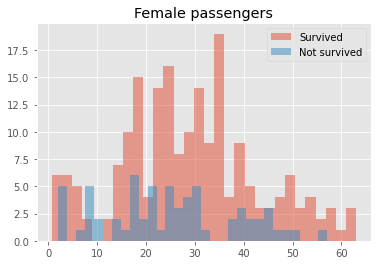

In [48]:
fig, ax = plt.subplots()

ax.hist(females_1['Age'],
        bins = 30, 
        alpha = 0.5,
        label = 'Survived')

ax.hist(females_0['Age'],
        bins = 30, 
        alpha = 0.5,
        label = 'Not survived')

ax.set_title('Female passengers')


ax.legend()

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Create a figure with two subplots:
        
- In the first subplot, show a histogram of the age of female passengers seperately for those that survived and for those that did not.
        
        
- In the second subplot, show a histogram of the age of the male passengers seperately for those that survived and for those that did not.
               
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
# new dfs with males that survived and males that did not survive (remember to use copy command!)
males_1 = titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)].copy()
males_0 = titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 0)].copy()

fig, ax = plt.subplots(nrows = 1, 
                       ncols = 2, 
                       figsize = (10, 3), 
                       sharey = True) # set same y-range in both subplots

# subplot 1 (females):
    
ax[0].hist(females_1['Age'],
           bins = 30, 
           alpha = 0.5,
           label = 'Survived')
    
ax[0].hist(females_0['Age'],
           bins = 30, 
           alpha = 0.5,
           label = 'Not survived')

# subplot 2 (males):
    
ax[1].hist(males_1['Age'],
           bins = 30, 
           alpha = 0.5,
           label = 'Survived')
    
ax[1].hist(males_0['Age'],
           bins = 30, 
           alpha = 0.5,
           label = 'Not survived')

# set titles and add legends
ax[0].set_title('Female passengers')
ax[1].set_title('Male passengers')
ax[0].legend()
ax[1].legend()

plt.show()
    
```

</p>
</details> 

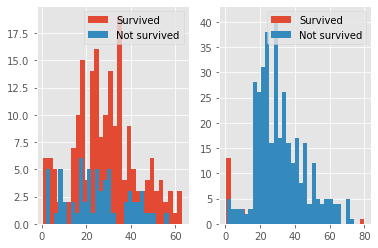

In [82]:
fig, ax = plt.subplots(ncols=2)

males_1 = titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 1)].copy()
males_0 = titanic[(titanic['Sex'] == 'male') & (titanic['Survived'] == 0)].copy()

ax[0].hist(females_1['Age'],
          bins=30,
          label="Survived")
ax[0].hist(females_0['Age'],
          bins=30,
          label="Not survived")
ax[0].legend()


ax[1].hist(males_1['Age'],
          bins=30,
          label="Survived")
ax[1].hist(males_0['Age'],
          bins=30,
          label="Not survived")
ax[1].legend()
plt.show()

## Groupby

The `groupby` function groups together rows based on the columns and returns an object
that contains information about the groups.

This is very helpful in data analysis as it helps us summarize information about different groups in our data.

In [84]:
df['Pass'] = ['yes', 'no', 'yes', 'yes']

df

,Name,Score,Age,City,Pass
0,Ole,65,19,Bergen,yes
1,Jenny,58,18,Oslo,no
2,Chang,79,20,Trondheim,yes
3,Jonas,95,22,Bergen,yes


`groupby` returns an object that we can perform operations on.

In [87]:
pass_group = df.groupby('Pass')

In [86]:
pass_group

We can retrive summary statistics for the groups using e.g. `mean`, `sum`, `count`, `max`.

In [89]:
pass_group.mean()

,Score,Age
Pass,,
no,58.000000,18.000000
yes,79.666667,20.333333


In [91]:
pass_group['Score'].mean()

Pass
no     58.000000
yes    79.666667
Name: Score, dtype: float64

We can use `value_counts` to count the number of passengers in our Titanic data that survived.

In [92]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

But what if we want to know the number of passengers that survived in 1st, 2nd and 3rd class?

Then we first have to group the data together on the column `Pclass`.

In [93]:
titanic.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

We can use `mean` to calculate the average age of passengers traveling 1st, 2nd and 3rd class.

In [94]:
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

But what if we want to know the average age for men and women traveling 1st, 2nd and 3rd class?

We can group the data by *multiple* columns by passing a list of column names to `groupby`.

In [95]:
titanic.groupby(['Pclass', 'Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> What was the most expensive ticket, i.e. highest fare, in 1st, 2nd and 3rd class?
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
titanic.groupby('Pclass')['Fare'].max()   
```

</p>
</details> 

In [98]:
titanic.groupby(['Pclass'])['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

**Plotting**

Let us plot the share of survivors by 1st, 2nd and 3rd class.

We must first calculate the share of survivors in each class.

In [99]:
pclass = titanic.groupby('Pclass')['Survived'].mean()

pclass

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

We can then update the index of the `Series`.

In [100]:
pclass.index = ['1st class', '2nd class', '3rd class']

pclass

1st class    0.629630
2nd class    0.472826
3rd class    0.242363
Name: Survived, dtype: float64

We can then use `bar` from `matplotlib` to show the share of survivors by `pclass` in a bar plot.

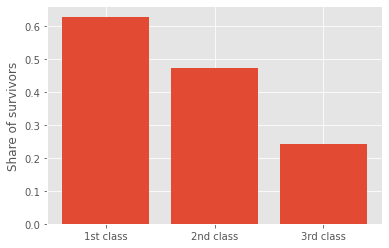

In [101]:
fig, ax = plt.subplots()

ax.bar(pclass.index,
       pclass)

ax.set_ylabel('Share of survivors')

plt.show()

<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Use <code>mpg_df</code> and create a bar plot of average <code>mpg</code> by the <code>origin</code> of the car. 
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
# df with average mpg by origin (do not need to use copy because we are not subsetting an existing df)
origin = mpg_df.groupby('origin')['mpg'].mean()
    
fig, ax = plt.subplots()

ax.bar(origin.index,
       origin)

ax.set_ylabel('Average mpg')

plt.show() 
```

</p>
</details> 

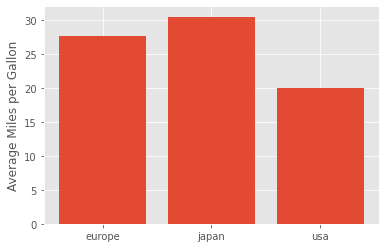

In [109]:
mpg_df_origin = mpg_df.groupby("origin")["mpg"].mean()

fig, ax = plt.subplots()

ax.bar(mpg_df_origin.index,
      mpg_df_origin)

ax.set_ylabel("Average Miles per Gallon")
plt.show()

### Combining data

`pandas` offers several different ways of combining `DataFrame`s. The two most useful functions for combining data are `concat` and `merge`.

**Concat**

We can use `concat` to stack `DataFrame`s that share the same columns, but have different observations. 

In [110]:
df # original df with grades

,Name,Score,Age,City,Pass
0,Ole,65,19,Bergen,yes
1,Jenny,58,18,Oslo,no
2,Chang,79,20,Trondheim,yes
3,Jonas,95,22,Bergen,yes


In [112]:
# create dict
grade_dict2 = {'Name'  : ['Nico', 'Maria', 'Mario', 'Janne'],
               'Score' : [67, 48, 92, 71], 
               'Age'   : [18, 24, 21, 20], 
               'City'  : ['Bergen', 'Oslo', 'Oslo', 'Trondheim'],
               'Pass'  : ['yes', 'no', 'yes', 'yes']}

# convert dict to df
df2 = pd.DataFrame(grade_dict2)

df2 # new df with additional grades

,Name,Score,Age,City,Pass
0,Nico,67,18,Bergen,yes
1,Maria,48,24,Oslo,no
2,Mario,92,21,Oslo,yes
3,Janne,71,20,Trondheim,yes


As a default, `concat` stacks a list of `DataFrame`s on top of each other. 

In [114]:
pd.concat([df, df2])

,Name,Score,Age,City,Pass
0,Ole,65,19,Bergen,yes
1,Jenny,58,18,Oslo,no
2,Chang,79,20,Trondheim,yes
3,Jonas,95,22,Bergen,yes
0,Nico,67,18,Bergen,yes
1,Maria,48,24,Oslo,no
2,Mario,92,21,Oslo,yes
3,Janne,71,20,Trondheim,yes


But what if the `DataFrame`s do not have the exact same columns?

Let us drop `Pass` from `df2`.

In [115]:
df2.drop('Pass', axis = 1, inplace = True)

df2

,Name,Score,Age,City
0,Nico,67,18,Bergen
1,Maria,48,24,Oslo
2,Mario,92,21,Oslo
3,Janne,71,20,Trondheim


We can still `concat` the `DataFrame`s. `concat` will simply fill the cells with missing data with `NaN`.

In [116]:
# store in new variable
df3 = pd.concat([df, df2]) 

df3

,Name,Score,Age,City,Pass
0,Ole,65,19,Bergen,yes
1,Jenny,58,18,Oslo,no
2,Chang,79,20,Trondheim,yes
3,Jonas,95,22,Bergen,yes
0,Nico,67,18,Bergen,NaN
1,Maria,48,24,Oslo,NaN
2,Mario,92,21,Oslo,NaN
3,Janne,71,20,Trondheim,NaN


However, notice that the index is now no longer unique to each observation (row). 

This can be fixed using the `reset_index` function. `inplace = True` will reset the index in the original `DataFrame`, while `drop = True` will avoid that the old index is added as a new column.

In [117]:
df3.reset_index(inplace = True, drop = True)

df3

,Name,Score,Age,City,Pass
0,Ole,65,19,Bergen,yes
1,Jenny,58,18,Oslo,no
2,Chang,79,20,Trondheim,yes
3,Jonas,95,22,Bergen,yes
4,Nico,67,18,Bergen,NaN
5,Maria,48,24,Oslo,NaN
6,Mario,92,21,Oslo,NaN
7,Janne,71,20,Trondheim,NaN


<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Use <code>concat</code> to combine the observations in <code>females</code> and <code>males</code> that we created earlier back together. Check that you have 891 observations in the new <code>DataFrame</code>. 
 
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
titanic_concat = pd.concat([females, males], axis = 0)

print(len(titanic_concat))
```

</p>
</details> 

In [122]:
females = pd.concat([females_0,females_1])
males = pd.concat([males_0,males_1])



passengers = pd.concat([males,females])

len(passengers)


891

**Merge**

We can use `merge` to combine `DataFrame`s that share the same observations, but have different columns.

In [123]:
df1 = pd.DataFrame({'Name': ['Ole', 'Jenny', 'Chang', 'Jonas', 'Mario'],
                    'Score1' : [65.0, 58.0, 79.0, 95.0, 92.0]})

df1

,Name,Score1
0,Ole,65.0
1,Jenny,58.0
2,Chang,79.0
3,Jonas,95.0
4,Mario,92.0


In [124]:
df2 = pd.DataFrame({'Name': ['Ole', 'Chang', 'Jonas', 'Mario', 'Nico', 'Maria'],
                    'Score2' : [70.0, 77.0, 92.0, 92.0, 72.0, 68.0]})

df2

,Name,Score2
0,Ole,70.0
1,Chang,77.0
2,Jonas,92.0
3,Mario,92.0
4,Nico,72.0
5,Maria,68.0


The two `DataFrame`s share the column `Name`, and we can merge the data on `Name` using `merge`.

We must specify that we want to merge on `Name`.

In [125]:
df1.merge(df2, on = 'Name')

,Name,Score1,Score2
0,Ole,65.0,70.0
1,Chang,79.0,77.0
2,Jonas,95.0,92.0
3,Mario,92.0,92.0


By default, `merge` will combine only those observations found in both `DataFrame`s, i.e. an inner join.

If we want to keep all of the observations in the left `DataFrame`, we must set `how = 'left'`.

In [126]:
df1.merge(df2, on = 'Name', how = 'left')

,Name,Score1,Score2
0,Ole,65.0,70.0
1,Jenny,58.0,NaN
2,Chang,79.0,77.0
3,Jonas,95.0,92.0
4,Mario,92.0,92.0


Or if we want to keep all of the observations in the right `DataFrame`, we must set `how = 'right'`.

In [127]:
df1.merge(df2, on = 'Name', how = 'right')

,Name,Score1,Score2
0,Ole,65.0,70.0
1,Chang,79.0,77.0
2,Jonas,95.0,92.0
3,Mario,92.0,92.0
4,Nico,NaN,72.0
5,Maria,NaN,68.0


Or if we want to keep all observations in both `DataFrame`s, we must set `how = 'outer'`.

In [128]:
df1.merge(df2, on = 'Name', how = 'outer')

,Name,Score1,Score2
0,Ole,65.0,70.0
1,Jenny,58.0,NaN
2,Chang,79.0,77.0
3,Jonas,95.0,92.0
4,Mario,92.0,92.0
5,Nico,NaN,72.0
6,Maria,NaN,68.0


Notice that when the `DataFrame`s have more than one common variable, we must merge on all of the common variables.

In [129]:
df1 = pd.DataFrame({'Name'       : ['Ole', 'Jenny', 'Chang', 'Jonas', 'Mario'],
                    'Student_no' : ['s1001', 's1002', 's1003', 's1004', 's1005'],
                    'Score1'     : [65.0, 58.0, 79.0, 95.0, 92.0]})

df1

,Name,Student_no,Score1
0,Ole,s1001,65.0
1,Jenny,s1002,58.0
2,Chang,s1003,79.0
3,Jonas,s1004,95.0
4,Mario,s1005,92.0


In [130]:
df2 = pd.DataFrame({'Name'       : ['Ole', 'Chang', 'Jonas', 'Mario', 'Nico', 'Maria'],
                    'Student_no' : ['s1001', 's1003', 's1004', 's1005', 's1006', 's1007'],
                    'Score2'     : [70.0, 77.0, 92.0, 92.0, 72.0, 68.0]})

df2

,Name,Student_no,Score2
0,Ole,s1001,70.0
1,Chang,s1003,77.0
2,Jonas,s1004,92.0
3,Mario,s1005,92.0
4,Nico,s1006,72.0
5,Maria,s1007,68.0


In [131]:
df1.merge(df2, on = 'Name', how = 'outer')

,Name,Student_no_x,Score1,Student_no_y,Score2
0,Ole,s1001,65.0,s1001,70.0
1,Jenny,s1002,58.0,NaN,NaN
2,Chang,s1003,79.0,s1003,77.0
3,Jonas,s1004,95.0,s1004,92.0
4,Mario,s1005,92.0,s1005,92.0
5,Nico,NaN,NaN,s1006,72.0
6,Maria,NaN,NaN,s1007,68.0


We can merge on multiple variables by passing a list of variables to `on` in `merge`.

In [132]:
df_merge = df1.merge(df2, on = ['Name', 'Student_no'], how = 'outer')

In [133]:
df_merge

,Name,Student_no,Score1,Score2
0,Ole,s1001,65.0,70.0
1,Jenny,s1002,58.0,NaN
2,Chang,s1003,79.0,77.0
3,Jonas,s1004,95.0,92.0
4,Mario,s1005,92.0,92.0
5,Nico,s1006,NaN,72.0
6,Maria,s1007,NaN,68.0


<div class="alert alert-info">
<h3> Your turn</h3>
    <p> The file <code>titanic_fam.csv</code> contains additional information for each passenger in our <code>titanic</code> data:
        
- SibSp: number of siblings and spouse on board
- Parch: number of parents and children on board
        
Import the file, and merge it with <code>titanic</code>.
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
# import additional data
titanic_fam = pd.read_csv('data/titanic_fam.csv')

# merge with original data (and overwrite the old variable name)
titanic = titanic.merge(titanic_fam, on = ['PassengerId', 'Name'])
```

</p>
</details> 

In [136]:
titanic_fam = pd.read_csv("data/titanic_fam.csv")

titanic_merge = titanic.merge(titanic_fam,on=["Name","PassengerId"])

titanic_merge

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,23.4500,1,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,0,0


## Reshape

Usually in data analysis we want tidy data:
1. Each column is a variable
2. Each row is an observation

This is also known as *long* data. 

<img src="images/tidy.png" width = "60%" align="left"/>

Let us create a `DataFrame` that contains (made-up) closing prices for Google and Apple during a week. 

Since there are two columns constaining the closing price, this is not *long* data. Instead it is *wide*. 

In [137]:
data = {'Day'    : ['MON', 'TUE', 'WED', 'THU', 'FRI'], 
        'Google' : [1129, 1132, 1134, 1152, 1152], 
        'Apple'  : [191, 192, 190, 190, 188]}

wide_df = pd.DataFrame(data)

wide_df

,Day,Google,Apple
0,MON,1129,191
1,TUE,1132,192
2,WED,1134,190
3,THU,1152,190
4,FRI,1152,188


`melt` reshapes a `DataFrame` from wide to long. In order to use `melt`, we must pass a column label to the `id_vars` parameter. This is the column that we want to leave "untouched".

In [138]:
wide_df.melt(id_vars = 'Day')

,Day,variable,value
0,MON,Google,1129
1,TUE,Google,1132
2,WED,Google,1134
3,THU,Google,1152
4,FRI,Google,1152
5,MON,Apple,191
6,TUE,Apple,192
7,WED,Apple,190
8,THU,Apple,190
9,FRI,Apple,188


In addition, we can pass arguments to the `var_name` and `value_name` parameters in order to specify the new column names.

In [139]:
long_df = wide_df.melt(id_vars = 'Day', var_name = 'Company', value_name = 'Closing Price')

long_df

,Day,Company,Closing Price
0,MON,Google,1129
1,TUE,Google,1132
2,WED,Google,1134
3,THU,Google,1152
4,FRI,Google,1152
5,MON,Apple,191
6,TUE,Apple,192
7,WED,Apple,190
8,THU,Apple,190
9,FRI,Apple,188


<div class="alert alert-info">
<h3> Your turn</h3>
    <p> Reshaping data from long to wide is known as pivoting. To pivot a <code>DataFrame</code>, <code>pandas</code> has a function called <code>pivot</code>.
        
See if you can find out how to pivot <code>long_df</code> back to <code>wide_df</code>.
        
</div>

**Solution**

<details>
    
<summary> Click to expand!</summary>
<p> 

```c#
# pivot from long to wide
wide_df = long_df.pivot(index = 'Day', columns = 'Company', values = 'Closing Price').reset_index()

# remove index name (not necessary, just to make it look nicer)
wide_df.rename_axis(None, axis = 1, inplace = True)

```

</p>
</details> 

In [149]:

wide_df = long_df.pivot(index="Day",columns="Company",values="Closing Price").reset_index()

wide_df.rename_axis(None,axis=1,inplace=True)
wide_df

,Day,Apple,Google
0,FRI,188,1152
1,MON,191,1129
2,THU,190,1152
3,TUE,192,1132
4,WED,190,1134


## Mandatory exercise part 1

In this exercise you are asked to work with two different datasets:
- `closing_prices.csv` contains the daily closing price in 2020 for ten different stocks.
- `EXR.xlsx` contains that daily exchange rate from USD to NOK in 2020 retrieved from Norges Bank.

You are asked to:

1. Import and clean the files
2. Merge the files and convert the closing price from USD to NOK
3. Create and save a graph that shows the daily closing price in NOK for Apple

In [265]:
closing_prices = pd.read_csv("data/closing_prices.csv")
EXR = pd.read_excel("data/EXR.xlsx")

#closing_prices = closing_prices.dropna(axis=0,inplace=True)
#closing_prices = closing_prices.dropna(axis=1,inplace=True)

#EXR = EXR.dropna(axis=0,inplace=True)
#EXR = EXR.dropna(axis=1,inplace=True)
EXR.drop([0,1 , 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], inplace=True)
EXR = EXR.transpose().copy()
#EXR.rename(columns={"18":"Date","19":"Exchange Rate"})
closing_prices

,Date,Close,Stock
0,2020-01-02,75.087502,AAPL
1,2020-01-03,74.357498,AAPL
2,2020-01-06,74.949997,AAPL
3,2020-01-07,74.597504,AAPL
4,2020-01-08,75.797501,AAPL
...,...,...,...
2515,2020-12-23,143.220001,WMT
2516,2020-12-24,143.500000,WMT
2517,2020-12-28,145.220001,WMT
2518,2020-12-29,144.300003,WMT


In [269]:

EXR = EXR.rename(columns={18:"Date",19:"Exchange Rate"}).copy()
EXR.reset_index(inplace = True)
EXR=EXR.drop('index',axis=1).copy()

EXR


,Date,Exchange Rate
0,2020-01-02,8.7919
1,2020-01-03,8.8199
2,2020-01-06,8.7983
3,2020-01-07,8.821
4,2020-01-08,8.8626
...,...,...
248,2020-12-23,8.7324
249,2020-12-28,8.6515
250,2020-12-29,8.6059
251,2020-12-30,8.5881


In [267]:
closing_prices = closing_prices.pivot(index="Date",columns="Stock",values="Close").copy()
closing_prices


Stock,AAPL,AMZN,BABA,FB,GOOG,JNJ,JPM,MSFT,TSLA,WMT
Date,,,,,,,,,,
2020-01-02,75.087502,1898.010010,219.770004,209.779999,1367.369995,145.970001,141.089996,160.619995,86.052002,118.940002
2020-01-03,74.357498,1874.969971,217.000000,208.669998,1360.660034,144.279999,138.339996,158.619995,88.601997,117.889999
2020-01-06,74.949997,1902.880005,216.639999,212.600006,1394.209961,144.100006,138.229996,159.029999,90.307999,117.650002
2020-01-07,74.597504,1906.859985,217.630005,213.059998,1393.339966,144.979996,135.880005,157.580002,93.811996,116.559998
2020-01-08,75.797501,1891.969971,218.000000,215.220001,1404.319946,144.960007,136.940002,160.089996,98.428001,116.160004
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,130.960007,3185.270020,256.179993,268.109985,1732.380005,151.940002,125.070000,221.020004,645.979980,143.220001
2020-12-24,131.970001,3172.689941,222.000000,267.399994,1738.849976,152.470001,124.519997,222.750000,661.770020,143.500000
2020-12-28,136.690002,3283.959961,222.360001,277.000000,1776.089966,153.190002,125.339996,224.960007,663.690002,145.220001


In [270]:
EXR = EXR.merge(closing_prices, on = 'Date',how="right")

EXR



,Date,Exchange Rate,AAPL,AMZN,BABA,FB,GOOG,JNJ,JPM,MSFT,TSLA,WMT
0,2020-01-02,8.7919,75.087502,1898.010010,219.770004,209.779999,1367.369995,145.970001,141.089996,160.619995,86.052002,118.940002
1,2020-01-03,8.8199,74.357498,1874.969971,217.000000,208.669998,1360.660034,144.279999,138.339996,158.619995,88.601997,117.889999
2,2020-01-06,8.7983,74.949997,1902.880005,216.639999,212.600006,1394.209961,144.100006,138.229996,159.029999,90.307999,117.650002
3,2020-01-07,8.821,74.597504,1906.859985,217.630005,213.059998,1393.339966,144.979996,135.880005,157.580002,93.811996,116.559998
4,2020-01-08,8.8626,75.797501,1891.969971,218.000000,215.220001,1404.319946,144.960007,136.940002,160.089996,98.428001,116.160004
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-12-23,8.7324,130.960007,3185.270020,256.179993,268.109985,1732.380005,151.940002,125.070000,221.020004,645.979980,143.220001
248,2020-12-24,NaN,131.970001,3172.689941,222.000000,267.399994,1738.849976,152.470001,124.519997,222.750000,661.770020,143.500000
249,2020-12-28,8.6515,136.690002,3283.959961,222.360001,277.000000,1776.089966,153.190002,125.339996,224.960007,663.690002,145.220001
250,2020-12-29,8.6059,134.869995,3322.000000,236.259995,276.779999,1758.719971,154.139999,125.010002,224.149994,665.989990,144.300003


In [274]:
EXR['AAPL'] = (EXR['AAPL']*EXR['Exchange Rate'])
EXR['AMZN'] = (EXR['AMZN']*EXR['Exchange Rate'])
EXR['BABA'] = (EXR['BABA']*EXR['Exchange Rate'])
EXR['FB'] = (EXR['FB']*EXR['Exchange Rate'])
EXR['GOOG'] = (EXR['GOOG']*EXR['Exchange Rate'])
EXR['JNJ'] = (EXR['JNJ']*EXR['Exchange Rate'])
EXR['JPM'] = (EXR['JPM']*EXR['Exchange Rate'])
EXR['MSFT'] = (EXR['MSFT']*EXR['Exchange Rate'])
EXR['TSLA'] = (EXR['TSLA']*EXR['Exchange Rate'])
EXR['WMT'] = (EXR['WMT']*EXR['Exchange Rate'])

EXR

,Date,Exchange Rate,AAPL,AMZN,BABA,FB,GOOG,JNJ,JPM,MSFT,TSLA,WMT
0,2020-01-02,8.7919,51028.861122,146711.439396,16987.673117,16215.47065,105694.289859,11283.116971,10905.904757,95883.624036,756.560596,1045.708604
1,2020-01-03,8.8199,51017.098051,145855.106544,16880.568014,16232.571861,105846.609438,11223.632886,10761.556274,94915.850185,781.460753,1039.778002
2,2020-01-06,8.7983,51046.729022,147302.098917,16770.12028,16457.384087,107925.908647,11154.793409,10700.395448,94145.289272,794.556868,1035.120013
3,2020-01-07,8.821,51200.919765,148372.853614,16933.799612,16578.20718,108415.839881,11280.899433,10572.82876,93262.922493,827.515617,1028.175742
4,2020-01-08,8.8626,52764.075488,148606.065566,17122.95797,16904.601061,110303.263355,11385.982143,10756.045406,95326.52802,872.328002,1029.479651
...,...,...,...,...,...,...,...,...,...,...,...,...
247,2020-12-23,8.7324,87204.631759,242892.159409,19534.956631,20444.675901,132102.307713,11586.155947,9537.189057,83282.549719,5640.955577,1250.654337
248,2020-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,2020-12-28,8.6515,88513.800062,245799.320332,16643.301917,20733.021273,132937.585012,11466.03455,9381.504706,81164.087961,5741.914052,1256.370839
250,2020-12-29,8.6059,85961.547925,246032.352199,17497.773119,20498.745995,130253.465179,11415.841819,9258.430115,79677.123723,5731.443255,1241.831396


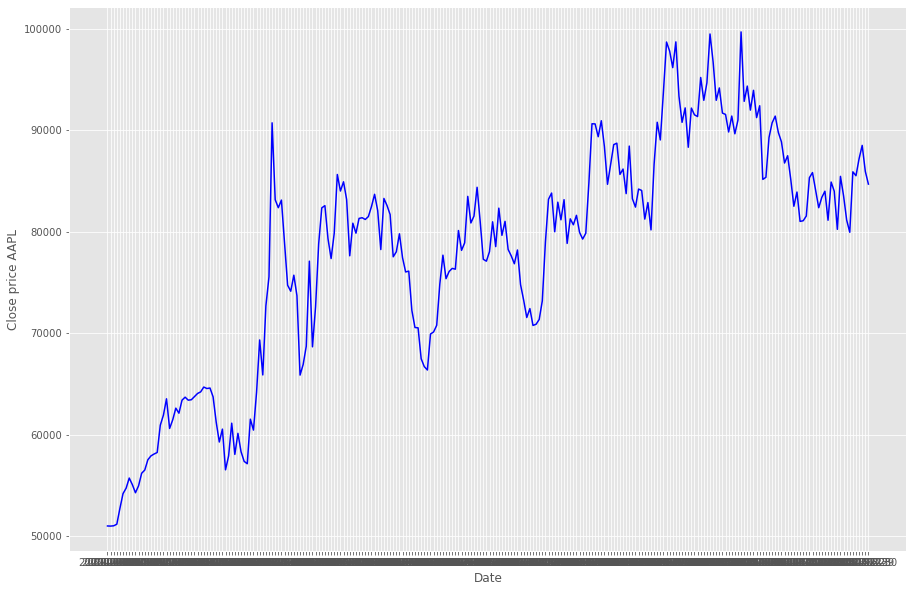

In [283]:
EXR = EXR.dropna(axis = 0).copy()

fig, ax = plt.subplots(figsize=(15,10)) 

ax.plot(EXR['Date'],
        EXR['AAPL'],
        color="blue")
ax.set_ylabel("Close price AAPL")
ax.set_xlabel("Date")
plt.savefig('data/AAPL_plot.png')